In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [264]:
df=pd.read_excel(r"C:\Users\user\Downloads\iris.xls")

In [265]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [267]:
df.shape

(150, 5)

In [268]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [269]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps.

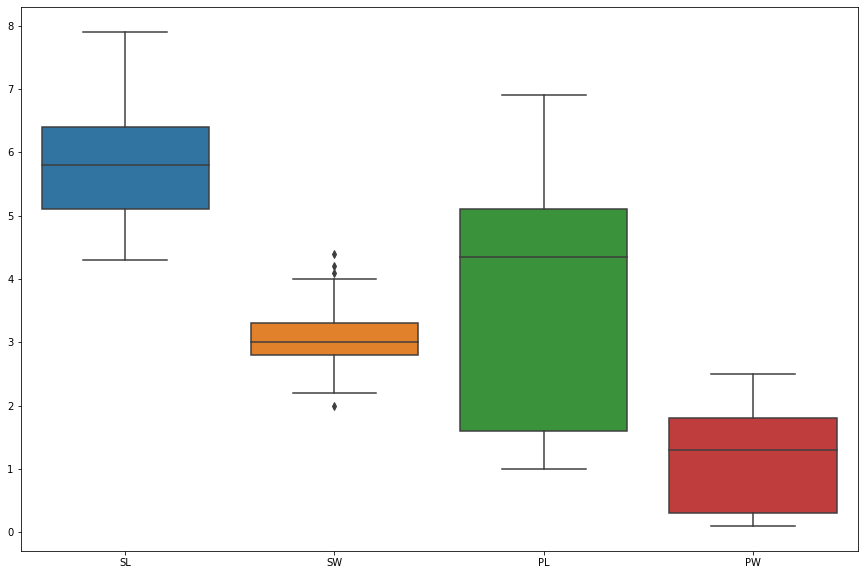

In [270]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

In [271]:
#Outliers are present only in SW. Since they are not extreme values they are not removed.

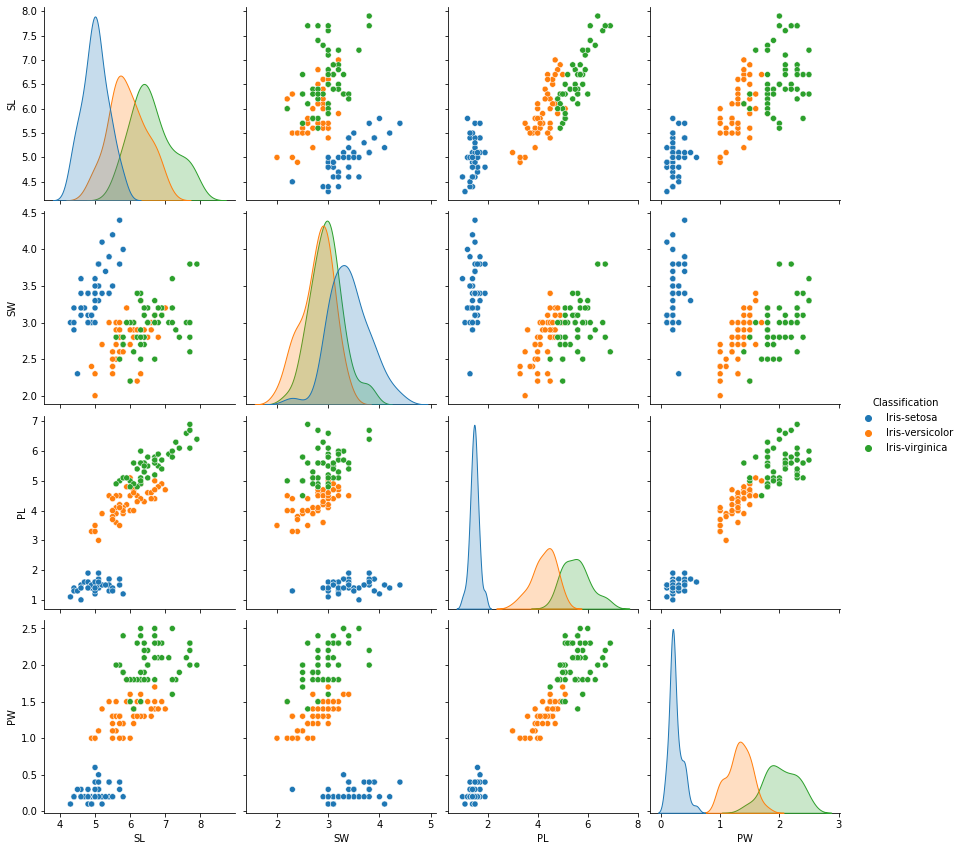

In [272]:
sns.pairplot(data=df, hue='Classification', diag_kind='kde', height=3)
plt.show()

In [273]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [274]:
#handling missing values

In [275]:
for i in ['SL', 'SW', 'PL']:
    df[i] = df[i].fillna(df[i].median())

In [276]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [277]:
#correlation betwen features

<AxesSubplot:>

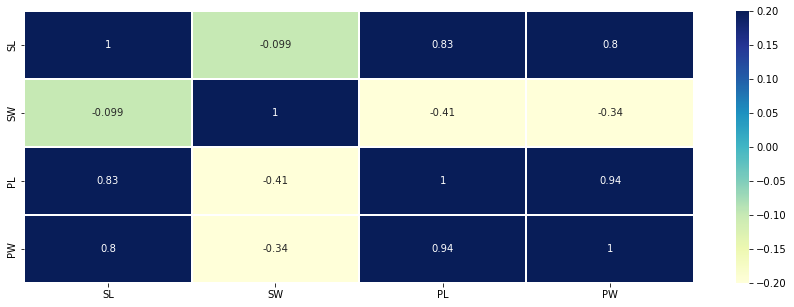

In [278]:
corrmatrix=df.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.2,annot=True,linewidth=0.2,cmap='YlGnBu')

In [279]:
#checking whether given data is balanced

In [280]:
df['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [281]:
#independent and dependent variable

In [282]:
y=df['Classification']
X=df.drop(['Classification'], axis=1)

In [283]:
#normalisation

In [284]:
from sklearn import preprocessing
X=preprocessing.normalize(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.751530,0.402199,0.458402,0.141163
std,0.047706,0.100803,0.158213,0.078751
min,0.631396,0.238392,0.167836,0.014727
25%,0.714322,0.326071,0.256770,0.048734
50%,0.754652,0.354679,0.536426,0.163851
75%,0.788443,0.514570,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


In [285]:
#splititting the data

In [286]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=0.2)

In [287]:
#number of datapoints

In [288]:
X_train.shape

(120, 4)

In [289]:
# 1.Logistic regression model

In [290]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)

y_pred = logi_model.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30

[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Accuracy is 0.9


In [291]:
#knn

In [292]:
from sklearn.neighbors import KNeighborsClassifier

acc_values = [] 
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
     
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)   

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]


Text(0, 0.5, 'Accuracy')

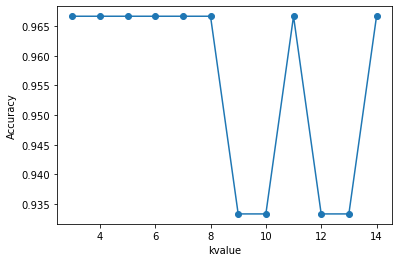

In [293]:
plt.plot(neighbors,acc_values, 'o-') 
plt.xlabel('kvalue')
plt.ylabel('Accuracy')

In [294]:

classifier = KNeighborsClassifier(n_neighbors = 6,metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
accuracy is 0.9666666666666667


In [295]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(confusion_matrix(y_test, y_pred))


print('accuracy is',accuracy_score(y_pred,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
accuracy is 0.6333333333333333


In [296]:
#SVM

In [297]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
accuracy is 0.9666666666666667


In [298]:
#Decision tree

In [299]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
F1 Score:  0.9333
accuracy is 0.9333333333333333


In [300]:
#Random forrest classifier

In [301]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Accuracy: ',accuracy_score(y_test, y_pred).round(4))
print('F1 Score: ',f1_score(y_test, y_pred, average='micro').round(4))
print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Model: RandomForestClassifier
Accuracy:  1.0
F1 Score:  1.0
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [304]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
   LogisticRegression(),
    KNeighborsClassifier(n_neighbors = 6,metric = 'minkowski'),
    SVC(kernel='linear'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
   
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 90.0000%
KNeighborsClassifier
****Results****
Accuracy: 96.6667%
SVC
****Results****
Accuracy: 63.3333%
DecisionTreeClassifier
****Results****
Accuracy: 93.3333%
RandomForestClassifier
****Results****
Accuracy: 100.0000%


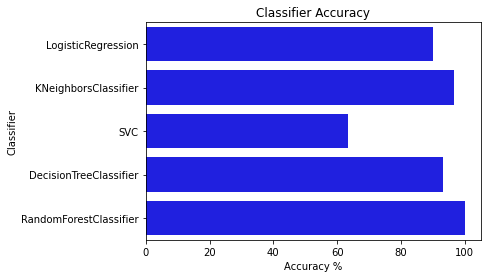

In [305]:
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [306]:
#Random Forest Classifier has got maximum accuracy and F1 score.So it gives the best result for predicting iris species.